In [13]:
import keras
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import os
   

In [14]:
def load_and_resize_images(folder, size):
   images = []
   for filename in os.listdir(folder):
       img = Image.open(os.path.join(folder, filename))
       img = img.resize((size, size))
       images.append(np.array(img))
   return np.array(images)


In [23]:
#1/2 import the train and test images and resize them to 256x256
image_size = 256
test_img = load_and_resize_images('./test', image_size)
train_img = load_and_resize_images('./train', image_size)

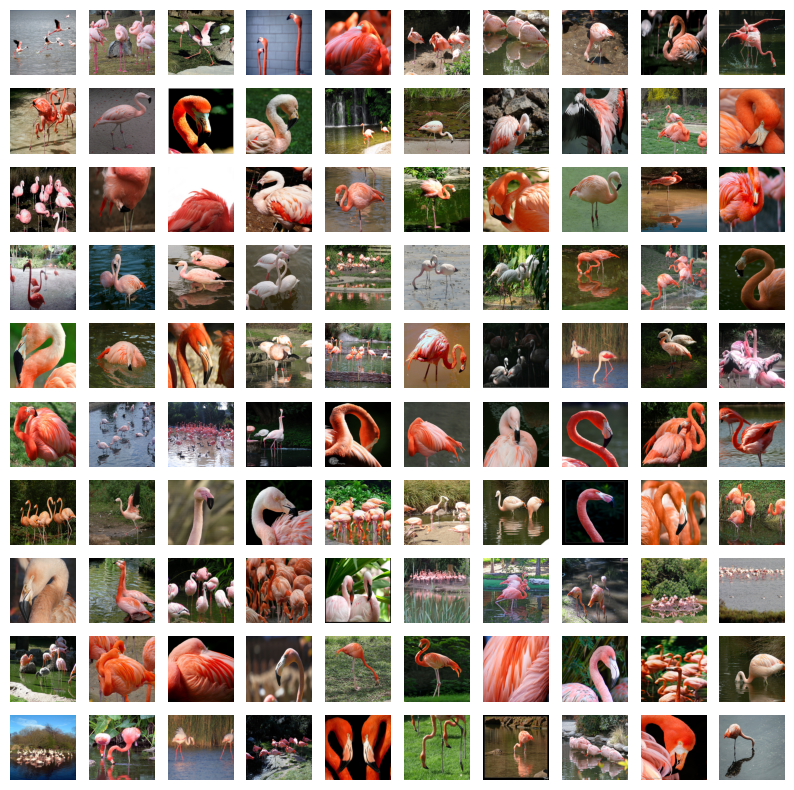

In [35]:

#3 visualize the first 100 images
fig, axis = plt.subplots(10, 10, figsize=(10, 10))
axis = axis.ravel()

for i in range(100):
    axis[i].imshow(train_img[i])
    axis[i].axis('off')
    


In [25]:
#4 scale train and test images to 0-1
X_train = train_img/255
X_test = test_img/255
#5 convert the images to greyscale
X_train_grey_img = color.rgb2gray(X_train)
X_test_grey_img = color.rgb2gray(X_test) 

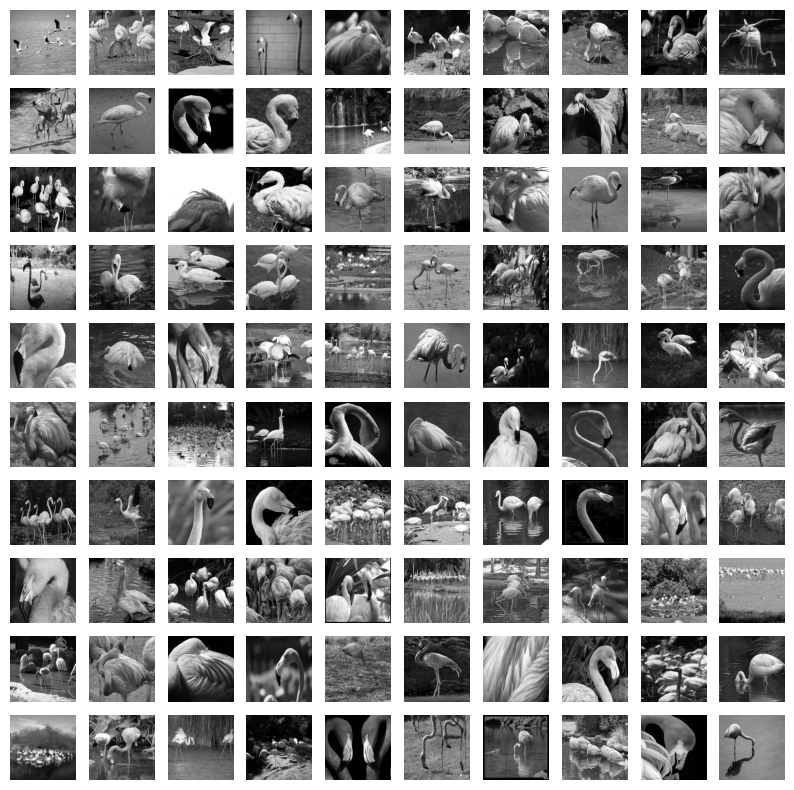

In [26]:
#visualize the first 100 greyscale images
fig, axis = plt.subplots(10, 10, figsize=(10, 10))
axis = axis.ravel()

for i in range(100):
    axis[i].imshow(X_train_grey_img[i], cmap='gray')
    axis[i].axis('off')

In [27]:
#6 set up the image shape
img_shape = X_train_grey_img.shape[1:] + (1,)
print(img_shape)


(256, 256, 1)


In [30]:
#7 build the autoencoder
autoencoder = tf.keras.Sequential()
autoencoder.add(tf.keras.Input(shape=img_shape))
#encoding
autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=img_shape))
autoencoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), activation='sigmoid', padding='same'))

autoencoder.compile(optimizer='adam', loss='mse')

In [33]:
#8 train the autoencoder
autoencoder.fit(X_train_grey_img, X_train, epochs=3, batch_size=50, shuffle=True, validation_data=(X_test_grey_img, X_test))


Epoch 1/3
26/26 [==============================] - 36s 1s/step - loss: 0.0504 - val_loss: 0.0215
Epoch 2/3
26/26 [==============================] - 38s 1s/step - loss: 0.0175 - val_loss: 0.0156
Epoch 3/3
26/26 [==============================] - 38s 1s/step - loss: 0.0157 - val_loss: 0.0148


1/1 [==============================] - 0s 89ms/step


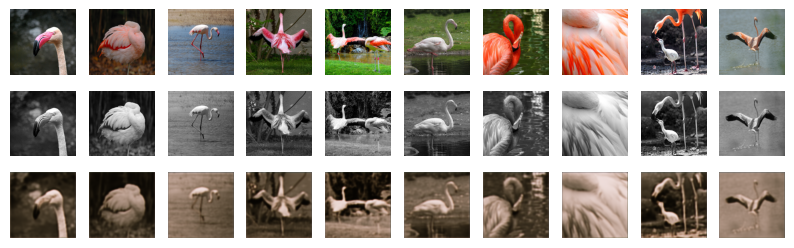

In [36]:
#9 visualize the original and reconstructed images
num_images = 10
grey_pred_images = autoencoder.predict(X_test_grey_img[:num_images])
img2_array = [X_test[:num_images], X_test_grey_img[:num_images], grey_pred_images]
fig, axes = plt.subplots(3, num_images, figsize=(num_images, 3))
for i, val in enumerate(img2_array):
    for j in range(num_images):
        if i == 1:
            axes[i, j].imshow(val[j], cmap='gray')
            axes[i, j].axis('off')
        else:
            axes[i, j].imshow(val[j])
            axes[i, j].axis('off')

# 10 the results were okay,
genrally it just added brown to the image and this was the result of a 90 seconds of training, 
the ways to improve this model are 
- to give it more time 
- Increase model params
- give it more data